# Moravec - The Corner Detector
`"Moravec"` typically refers to the Moravec corner detector, which is a method used to detect corners or interest points in digital images. It was introduced by Robert Moravec in 1980.

The Moravec corner detector works by comparing the intensity variations in different directions around a pixel. Corners are identified as locations where the intensity changes significantly in all directions. This method is based on the assumption that corners have high intensity changes in all directions, while edges have high intensity changes in only one direction.

Moravec corner detection is a relatively simple algorithm and can be computationally efficient, making it suitable for real-time applications. However, it may not always perform well under various conditions such as noise or texture.

- Import Files

In [1]:
import os
import skimage
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io

- Input Files

In [2]:
# Sample image of a white square
img = np.zeros((100,100))
img[25:75,25:75] += 255
#img = cv2.imread("sample.jpg", cv2.IMREAD_GRAYSCALE)

**Algorithm**
Steps:

1. **Initialize Cornerness Matrix**: The algorithm begins by creating an empty matrix called `corners` with the same shape as the input image `img`. This matrix will store the cornerness measure for each pixel.

2. **Select Patch Size**: The variable `w` determines the size of the patch around each pixel used to compute the cornerness measure. The patch size is defined as twice `w` plus one, so a value of `1` corresponds to a 3x3 patch, `3` corresponds to a 7x7 patch, and so on.

3. **Iterate Over Image**: Two nested loops iterate over each pixel in the image, except for a border of width `w` around the image edges. This ensures that there are enough neighboring pixels to form the patches.

4. **Compute Cornerness for Each Pixel**: For each pixel, a patch centered around it is extracted from the input image. This patch is referred to as the "central patch". Then, the algorithm considers each of the 8 neighboring pixels around the current pixel.

5. **Compute Cornerness Function**: For each neighboring pixel, a patch is extracted from the image, referred to as the "running patch". The cornerness measure is computed as the sum of squared intensity differences between the central patch and each running patch.

6. **Minimum Cornerness Value**: Among the computed cornerness values for the neighboring pixels, the algorithm selects the minimum value (`final_c`).

7. **Update Cornerness Image**: The minimum cornerness value (`final_c`) is assigned to the corresponding pixel in the `corners` matrix.

8. **Simple Thresholding**: After computing the cornerness for all pixels, a simple thresholding step is performed to filter out weak corners. A threshold value (`th`) is computed based on the mean and standard deviation of the cornerness values. Pixels with cornerness values above this threshold are considered corners and set to `True` in the `corners_filtered` matrix.

9. **Non-Maximum Suppression (NMS)**: The final step is to perform non-maximum suppression to ensure that only local maxima in the cornerness image are retained as corners. This is achieved by iterating over each pixel in the `corners_filtered` matrix and checking if it is a local maximum within a 3x3 window centered around it. If it is a local maximum, it is marked as `1` in the `nms` matrix; otherwise, it is set to `0`.

By the end of this process, you have the `corners` matrix containing the cornerness measure for each pixel, `corners_filtered` matrix with thresholded corners, and `nms` matrix with corners after non-maximum suppression. These matrices can be visualized to identify corners in the original image.

In [3]:
# Output cornerness image
corners = np.zeros(img.shape)


# Dimension of the patch (1 = 3x3, 3 = 7x7, 5 = 11x11, ...)
w = 1


# Slide over the image
for i in range(w+1,img.shape[0]-w-1):
  for j in range(w+1,img.shape[1]-w-1):

    # Patch around the point for which the cornerness is computed
    central_patch = img[i-w:i+w+1, j-w:j+w+1]

    final_c = np.inf

    # Consider the 8 neighbors around the current pixel
    for u in [-1,0,1]:
      for v in [-1,0,1]:
        if not(u == 0 and v==0):  # avoid position(0,0)

          running_patch = img[i+u-1:i+u+2, j+v-1:j+v+2]

          # Compute the cornerness function
          c = np.sum((central_patch - running_patch)**2)

        # Save the minimum cornerness value
        if final_c > c:
          final_c = c
    
    # Changing the correspoding Corner Matrix
    corners[i,j] = final_c


# Simple thresholding
th = corners.mean()+2*corners.std()
corners_filtered = corners > th


# Non maxima suppression
nms = np.zeros(img.shape)
for i in range(1,corners_filtered.shape[0]-2):
  for j in range(1,corners_filtered.shape[1]-2):

    window = corners_filtered[i-1:i+2,j-1:j+2]

    # if the element in the centre of the 3x3 window is not zero and is the max
    if(window[1,1] != 0 and window[:].argmax()==4):
      nms[i,j] = 1

- Illustration

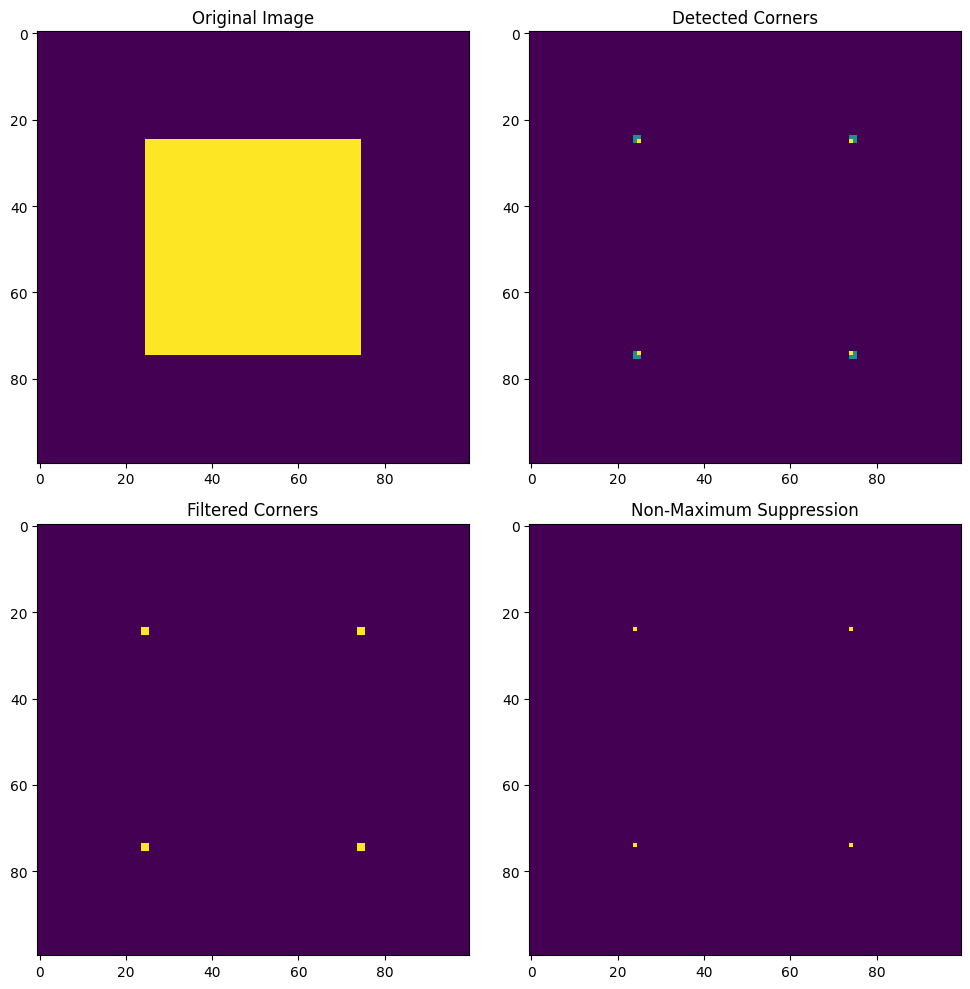

In [4]:
# Show results
plt.figure(figsize=(10, 10))

# First row
plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(corners)
plt.title('Detected Corners')

# Second row
plt.subplot(2, 2, 3)
plt.imshow(corners_filtered)
plt.title('Filtered Corners')

plt.subplot(2, 2, 4)
plt.imshow(corners_filtered * nms)
plt.title('Non-Maximum Suppression')

plt.tight_layout()
plt.show()
